# Fashion MNIST 분류기
- tensorflow로 구현

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## data load

In [2]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


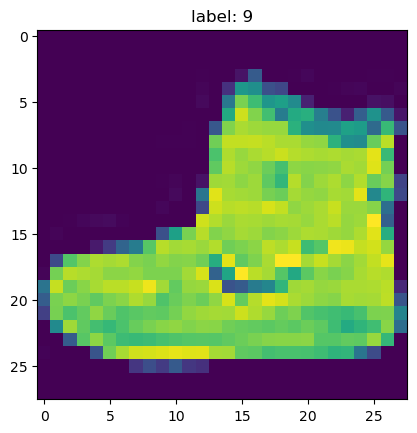

In [10]:
plt.imshow(train_X[0])
plt.title(f'label: {train_y[0]}')
plt.show()

## Model 구현

In [24]:
def make_model():
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=1))

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=2))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dense(564, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    return model

In [25]:
model = make_model()
print(model.summary())

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 28, 28, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 28, 28, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 14, 14, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1024)           │     6,423,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 564)            │       578,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         5,650 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 7,357,750 (28.07 MB)

 Trainable params: 7,356,790 (28.06 MB)

 Non-trainable params: 960 (3.75 KB)

None


## Model 학습

In [26]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
hist = model.fit(train_X, train_y, batch_size=32, validation_split=0.2, epochs=5)

Epoch 1/5


2024-06-23 14:52:48.175759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 70s 43ms/step - accuracy: 0.7922 - loss: 0.7675 - val_accuracy: 0.8798 - val_loss: 0.3406
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 63s 42ms/step - accuracy: 0.9014 - loss: 0.2784 - val_accuracy: 0.8981 - val_loss: 0.3043
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 62s 41ms/step - accuracy: 0.9168 - loss: 0.2324 - val_accuracy: 0.9097 - val_loss: 0.2401
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.9280 - loss: 0.2010 - val_accuracy: 0.9074 - val_loss: 0.3145
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.9306 - loss: 0.1896 - val_accuracy: 0.9164 - val_loss: 0.2411


## Moel test

In [28]:
pred = model.predict(test_X)
pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[3.4053189e-09, 2.1385584e-10, 7.5937701e-11, ..., 2.8705064e-04,
        4.1433476e-12, 9.9971157e-01],
       [6.2725320e-04, 3.5199848e-06, 9.1289765e-01, ..., 8.2336392e-08,
        8.9402711e-05, 1.1450173e-07],
       [0.0000000e+00, 1.0000000e+00, 5.9164353e-35, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.2737792e-09, 5.2537763e-22, 7.2404190e-15, ..., 3.1459249e-20,
        1.0000000e+00, 9.6458782e-19],
       [4.3469036e-29, 1.0000000e+00, 1.0435540e-24, ..., 0.0000000e+00,
        1.4286264e-35, 0.0000000e+00],
       [2.1766507e-06, 2.5342588e-08, 1.7915999e-06, ..., 3.4810409e-03,
        3.5967219e-03, 2.1296159e-04]], dtype=float32)

In [29]:
# 각 이미지에서 가장 큰 확률을 가지는 인덱스를 찾는다.

pred_y = pred.argmax(axis=1)
pred_y

array([9, 2, 1, ..., 8, 1, 5])

In [30]:
# 정확도 확인

acc_score = accuracy_score(test_y, pred_y)
acc_score

0.9088

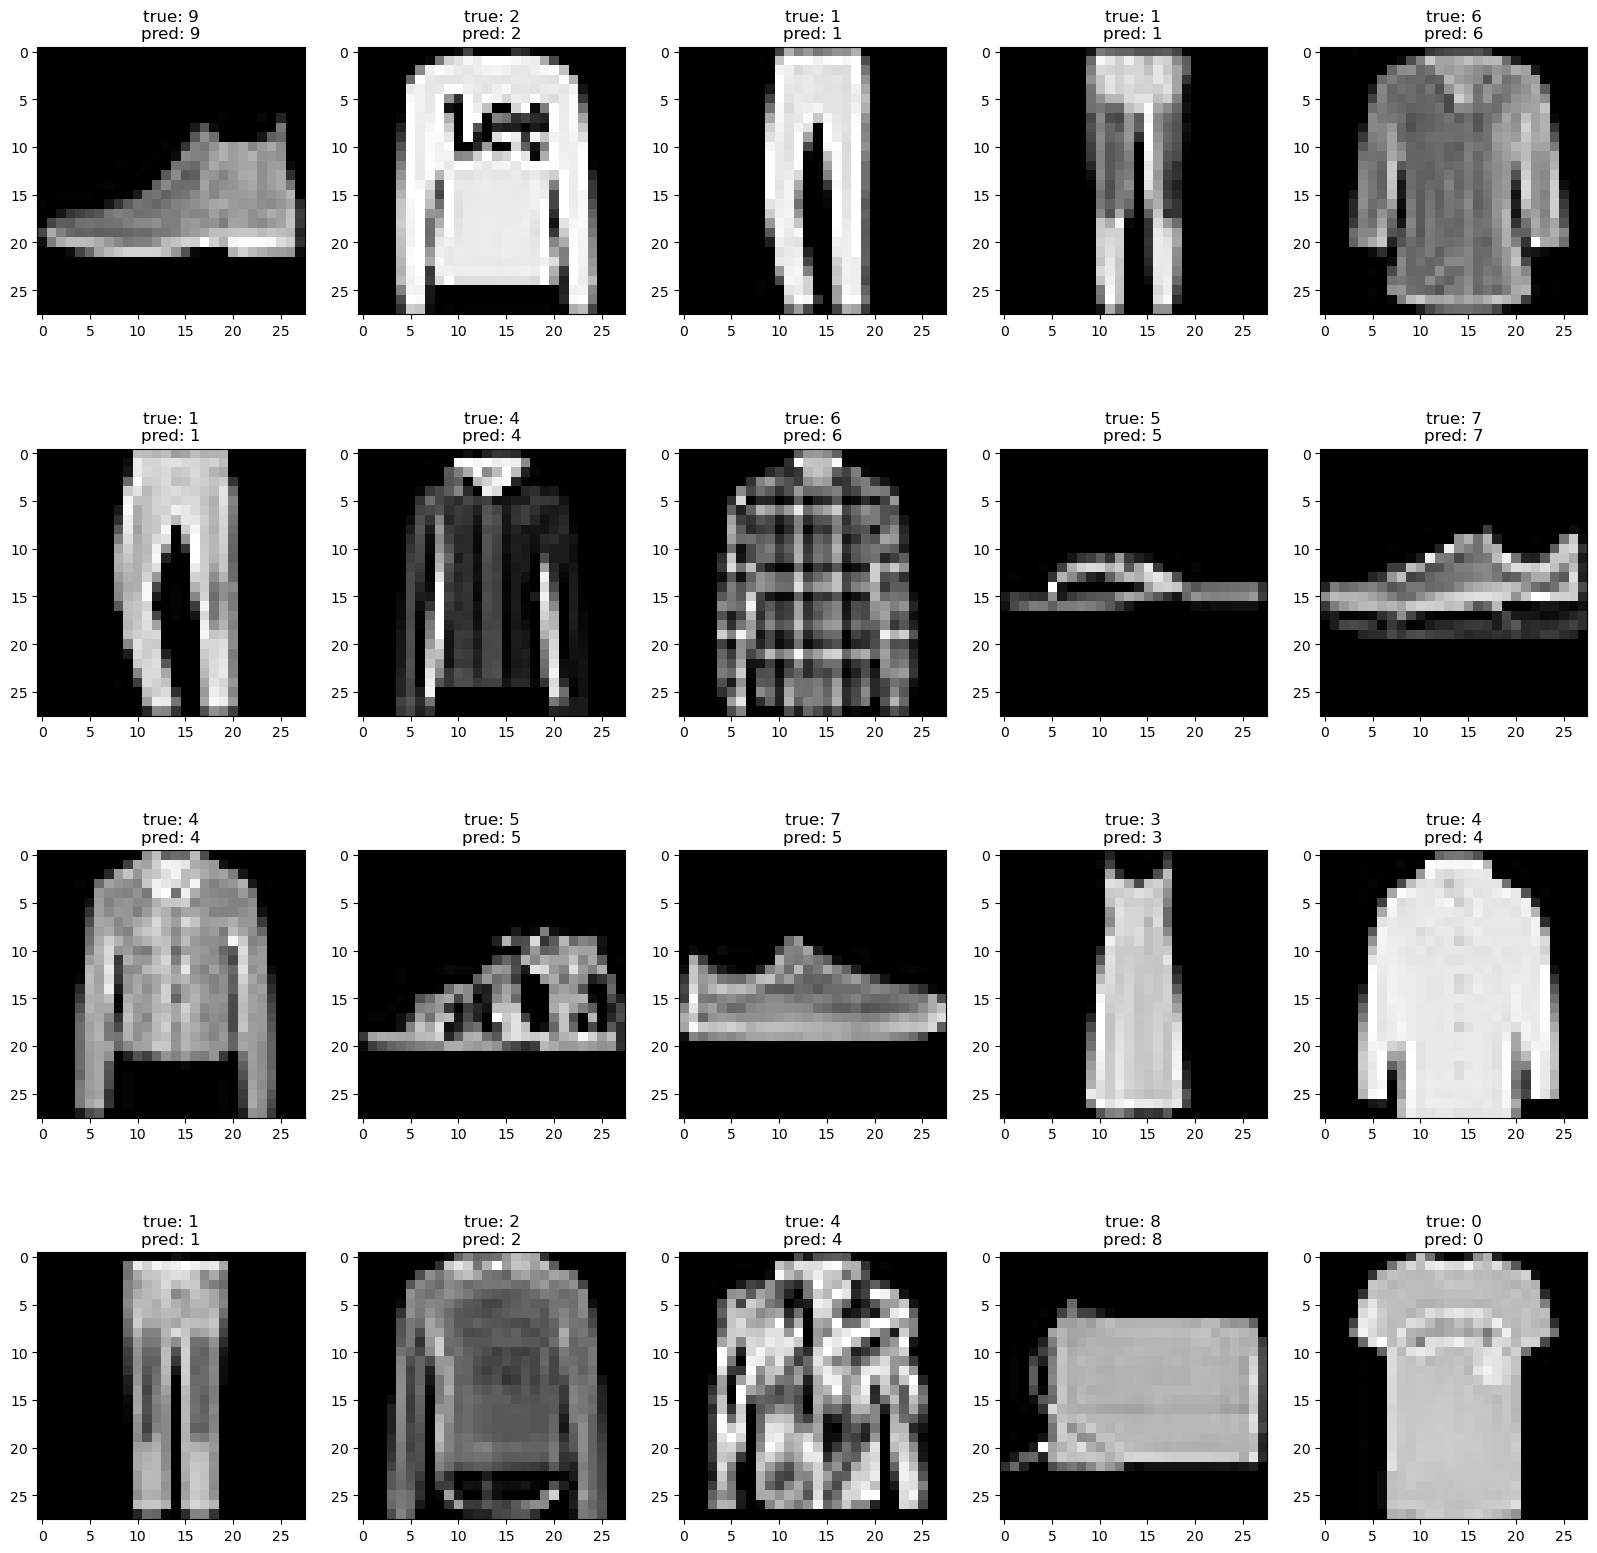

In [31]:
# 이미지와 정답, 예측 라벨 출력

plt.figure(figsize=(20, 20))

for i in range(20):
    image = test_X[i]
    label = test_y[i]
    pred_label = pred_y[i]

    ax = plt.subplot(4, 5, 1 + i)
    plt.imshow(image, cmap='gray')
    plt.title(f'true: {label}\npred: {pred_label}')